<a href="https://colab.research.google.com/github/AkashB7/Self-Evolving-Neural-Network-Model-for-Multiclass-Classification/blob/main/PlantVillageDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from os import listdir
from os.path import isfile, join

images = {}
im2 = []

for root, dirs, files in os.walk("Main-Folder-Path"):
   path = root.split(os.sep)
   for index, file in enumerate(files):
      im2 = [ f for f in listdir(root) if isfile(join(root,f)) ]
      images[index] = join(root,im2[index])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
#directory_root = 'https://drive.google.com/drive/folders/1ev00Kuyq7n1zdo9P7GY4S1ENPDb0xmGJ?usp=share_link'
directory_root = '/content/drive/MyDrive/PotatoDataset'
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
p_image_list = []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    pimage = Image.open(image_directory)
                    #image = image.resize((image_size, image_size))
                    p_image_list.append(np.array(pimage))
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Potato___Early_blight ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list)
print(image_size)

552


In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(label_binarizer.classes_)

['Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

[INFO] Spliting data to train, test


In [ ]:
train_images=x_train#[:,:,:,0]
test_images=x_test#[:,:,:,0]
train_labels=y_train
test_labels=y_test

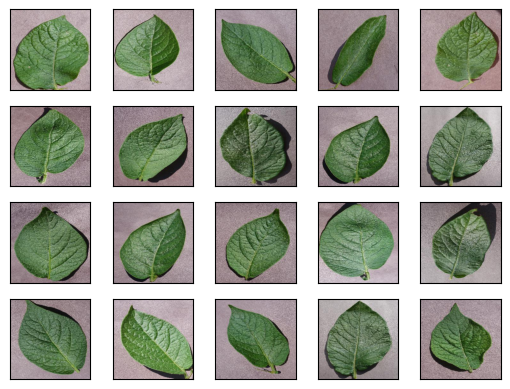

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

#image_size = 552

#directory_root = "/content/drive/MyDrive/PotatoDataset (1)/"

#test_image_paths = ["/content/drive/MyDrive/PotatoDataset (1)/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG", "/content/drive/MyDrive/PotatoDataset (1)/PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG", "/content/drive/MyDrive/PotatoDataset (1)/PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG"]

#test_images = []

#for image_path in test_image_paths:
#    image = Image.open(image_path)
#    #image = image.resize((image_size, image_size))
#    test_images.append(np.array(image))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(p_image_list[i])
plt.show()

In [ ]:
train_labels=np.nonzero(train_labels)[1]
test_labels=np.nonzero(test_labels)[1]

Epoch 1/35
14/14 [==============================] - 36s 2s/step - loss: 122.1396 - accuracy: 0.3810
Epoch 2/35
14/14 [==============================] - 31s 2s/step - loss: 21.2571 - accuracy: 0.5601
Epoch 3/35
14/14 [==============================] - 32s 2s/step - loss: 5.4726 - accuracy: 0.6893
Epoch 4/35
14/14 [==============================] - 31s 2s/step - loss: 3.4508 - accuracy: 0.7347
Epoch 5/35
14/14 [==============================] - 31s 2s/step - loss: 2.5222 - accuracy: 0.8027
Epoch 6/35
14/14 [==============================] - 33s 2s/step - loss: 3.2464 - accuracy: 0.7551
Epoch 7/35
14/14 [==============================] - 32s 2s/step - loss: 4.6249 - accuracy: 0.6485
Epoch 8/35
14/14 [==============================] - 31s 2s/step - loss: 10.1129 - accuracy: 0.6576
Epoch 9/35
14/14 [==============================] - 30s 2s/step - loss: 6.8603 - accuracy: 0.7302
Epoch 10/35
14/14 [==============================] - 31s 2s/step - loss: 3.9063 - accuracy: 0.7710
Epoch 11/35
14/

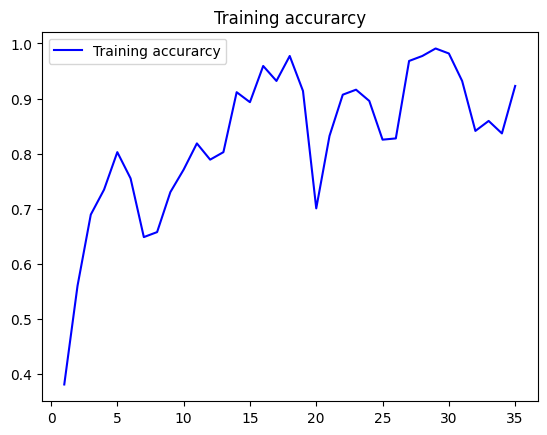

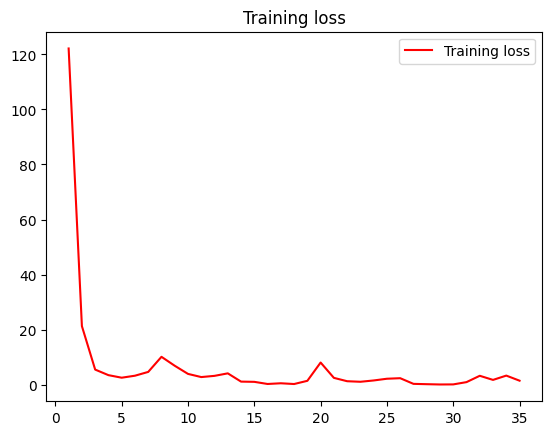

In [ ]:
import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=35)

acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.title('Training accurarcy')
plt.legend()
plt.show()

loss = history.history['loss']
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

Epoch 1/50
21/21 [==============================] - 39s 2s/step - loss: 5.4782 - accuracy: 0.7778 - val_loss: 7.0053 - val_accuracy: 0.7027
Epoch 2/50
21/21 [==============================] - 36s 2s/step - loss: 1.4510 - accuracy: 0.9093 - val_loss: 10.4073 - val_accuracy: 0.6306
Epoch 3/50
21/21 [==============================] - 37s 2s/step - loss: 0.6721 - accuracy: 0.9388 - val_loss: 17.8385 - val_accuracy: 0.5315
Epoch 4/50
21/21 [==============================] - 37s 2s/step - loss: 2.3999 - accuracy: 0.8617 - val_loss: 11.9035 - val_accuracy: 0.6757
Epoch 5/50
21/21 [==============================] - 37s 2s/step - loss: 0.9954 - accuracy: 0.9456 - val_loss: 4.2629 - val_accuracy: 0.7928
Epoch 6/50
21/21 [==============================] - 45s 2s/step - loss: 0.2387 - accuracy: 0.9728 - val_loss: 3.8309 - val_accuracy: 0.8378
Epoch 7/50
21/21 [==============================] - 45s 2s/step - loss: 0.0133 - accuracy: 0.9932 - val_loss: 4.0172 - val_accuracy: 0.7838
Epoch 8/50
21/21 

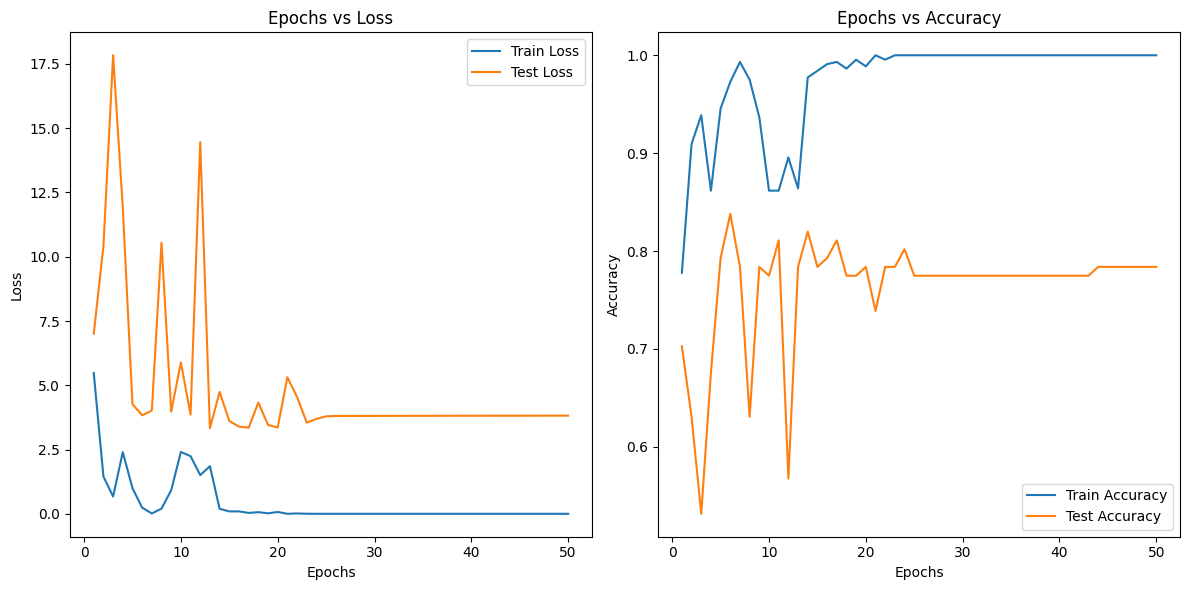

Train Loss: 4.476240746953408e-07
Train Accuracy: 1.0
Test Loss: 3.818739414215088
Test Accuracy: 0.7837837934494019


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

history = model.fit(x_train, y_train_int, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_int))

train_loss_history = history.history['loss']
train_accuracy_history = history.history['accuracy']
test_loss_history = history.history['val_loss']
test_accuracy_history = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs + 1), test_loss_history, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracy_history, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("Train Loss:", train_loss_history[-1])
print("Train Accuracy:", train_accuracy_history[-1])
print("Test Loss:", test_loss_history[-1])
print("Test Accuracy:", test_accuracy_history[-1])

In [ ]:
train_images = x_train#[:, :, :, 0]
num_train_images = train_images.shape[0]
print("Number of train images:", num_train_images)

Number of train images: 441


In [ ]:
test_images = x_test#[:, :, :, 0]
num_test_images = test_images.shape[0]
print("Number of test images:", num_test_images)

Number of test images: 111


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O))
        E_d_values.append(E_d)

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print()

Epoch: 1


<ipython-input-20-b1460eec7d3a>:55: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O))
<ipython-input-20-b1460eec7d3a>:55: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O))


Batchwise Mean (μ): [0.5337, 0.5386, 0.557, 0.5605, 0.5435, 0.532, 0.537, 0.5435, 0.541, 0.5454, 0.558, 0.547, 0.5503, 0.5674, 0.5527, 0.5464, 0.533, 0.541, 0.5444, 0.5366, 0.543]
E(v): [array([[  92.88955 ,   24.741531,  107.08594 , ...,  -90.878975,
         104.14539 ,   53.241104],
       [  95.182205,   29.3562  ,  106.036835, ...,  -98.97957 ,
         105.67751 ,   57.924023],
       [  96.198616,   44.284916,  112.01876 , ..., -101.3002  ,
         111.95981 ,   72.2965  ],
       ...,
       [  76.34491 ,   30.991493,   84.9116  , ...,  -73.89203 ,
          84.845345,   47.34176 ],
       [  89.93885 ,   43.44893 ,  103.476616, ...,  -94.24373 ,
         104.12101 ,   68.217285],
       [  97.82571 ,   33.641613,  112.32853 , ...,  -99.112724,
         110.84582 ,   64.26086 ]], dtype=float32), array([[  22.384554,  107.59526 ,   31.524908, ..., -129.54597 ,
          64.478004,  123.90895 ],
       [  21.38407 ,   97.08898 ,   30.843313, ..., -139.63957 ,
          60.881866

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Streaming output truncated to the last 5000 lines.
        153.19882],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
         89.03409],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        110.08354],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        115.48101]], dtype=float32), array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        151.25113],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        109.2016 ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        132.74944],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        123.48256],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        128.82378],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        149.6021 ]], dtype=float32), array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
        139

Epoch 1/50
21/21 [==============================] - 40s 2s/step - loss: 199.7850 - accuracy: 0.3628 - val_loss: 60.7378 - val_accuracy: 0.2973
Epoch 2/50
21/21 [==============================] - 39s 2s/step - loss: 38.4632 - accuracy: 0.5397 - val_loss: 18.6752 - val_accuracy: 0.4324
Epoch 3/50
21/21 [==============================] - 36s 2s/step - loss: 8.8092 - accuracy: 0.5760 - val_loss: 3.8979 - val_accuracy: 0.6937
Epoch 4/50
21/21 [==============================] - 37s 2s/step - loss: 4.6622 - accuracy: 0.6848 - val_loss: 5.3168 - val_accuracy: 0.6847
Epoch 5/50
21/21 [==============================] - 36s 2s/step - loss: 3.4551 - accuracy: 0.6871 - val_loss: 7.1346 - val_accuracy: 0.6126
Epoch 6/50
21/21 [==============================] - 38s 2s/step - loss: 4.4959 - accuracy: 0.7256 - val_loss: 2.7608 - val_accuracy: 0.7387
Epoch 7/50
21/21 [==============================] - 36s 2s/step - loss: 6.3999 - accuracy: 0.7075 - val_loss: 19.8344 - val_accuracy: 0.4685
Epoch 8/50
21/

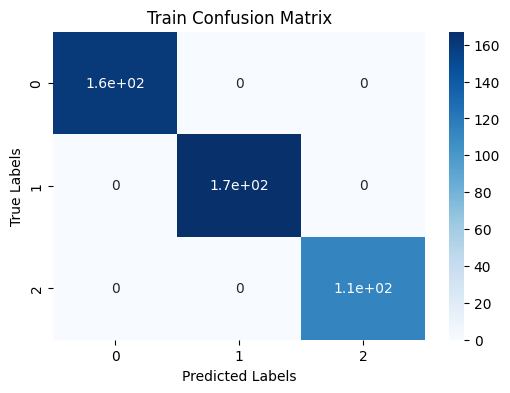

Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
Test Confusion Matrix:


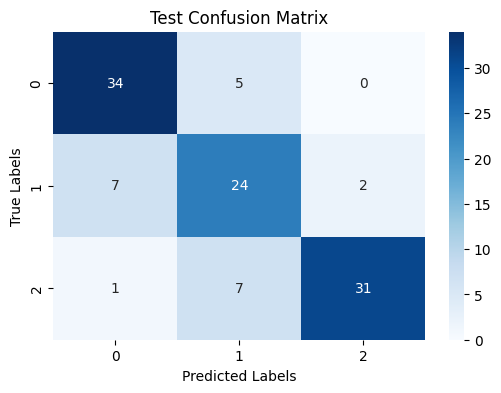

Test F1 Score: 0.8043296920108515
Test Precision: 0.8126828126828127
Test Recall: 0.8018018018018018


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import keras
import matplotlib.pyplot as plt
import seaborn as sns

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

history = model.fit(x_train, y_train_int, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_int))

train_loss_history = history.history['loss']
train_accuracy_history = history.history['accuracy']
test_loss_history = history.history['val_loss']
test_accuracy_history = history.history['val_accuracy']

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

train_pred_int = np.argmax(train_pred, axis=1)
test_pred_int = np.argmax(test_pred, axis=1)

train_cm = confusion_matrix(y_train_int, train_pred_int)
test_cm = confusion_matrix(y_test_int, test_pred_int)

train_f1 = f1_score(y_train_int, train_pred_int, average='weighted')
test_f1 = f1_score(y_test_int, test_pred_int, average='weighted')

train_precision = precision_score(y_train_int, train_pred_int, average='weighted')
test_precision = precision_score(y_test_int, test_pred_int, average='weighted')

train_recall = recall_score(y_train_int, train_pred_int, average='weighted')
test_recall = recall_score(y_test_int, test_pred_int, average='weighted')

print("Train Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Train Confusion Matrix')
plt.show()

print("Train F1 Score:", train_f1)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

print("Test Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix')
plt.show()

print("Test F1 Score:", test_f1)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
        E_d_values.append(E_d)

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d^2):", E_d_values[-num_batches:])
    print()

Epoch: 1


<ipython-input-16-d7bc7d9e9502>:55: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-16-d7bc7d9e9502>:55: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-16-d7bc7d9e9502>:55: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


Batchwise Mean (μ): [0.5337, 0.5386, 0.557, 0.5605, 0.5435, 0.532, 0.537, 0.5435, 0.541, 0.5454, 0.558, 0.547, 0.5503, 0.5674, 0.5527, 0.5464, 0.533, 0.541, 0.5444, 0.5366, 0.543]
E(v): [array([[ -0.27080452, 104.06741   ,  -1.8269428 , ...,  94.79708   ,
         93.316345  ,  -1.583442  ],
       [ -0.6427086 , 102.16493   ,  -1.3640189 , ...,  87.79753   ,
         88.647736  ,  -0.55021375],
       [ -1.2521244 , 108.94427   ,  -1.1408993 , ...,  87.4457    ,
         94.78646   ,  -0.7834474 ],
       ...,
       [ -0.33756846,  84.21943   ,  -0.9449888 , ...,  66.75737   ,
         78.342636  ,  -0.8355388 ],
       [ -0.62973565, 101.92726   ,  -1.4896652 , ...,  79.26006   ,
         89.75108   ,  -0.82911044],
       [ -0.90303445, 107.300804  ,  -1.9554272 , ...,  96.56483   ,
         93.43782   ,  -0.55038875]], dtype=float32), array([[-0.5155352 , 23.92343   , -1.450377  , ...,  9.79474   ,
        22.422579  , -0.65571856],
       [-0.9274549 , 23.020226  , -1.3743392 , .

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Streaming output truncated to the last 5000 lines.
       [1.69164187e-20, 7.53785208e-18, 1.72175077e-16],
       [2.32457718e-33, 9.97043669e-01, 7.82549137e-10],
       [1.48107973e-28, 1.88120310e-08, 6.04286015e-07],
       [3.15354062e-11, 3.13704232e-28, 3.36363484e-33],
       [7.82414818e-29, 5.59754369e-07, 3.94226372e-13],
       [2.17536209e-15, 2.37712619e-22, 5.56136766e-35],
       [3.31512465e-30, 5.98471270e-05, 3.24212499e-13],
       [8.76963053e-13, 3.41066323e-27, 8.34882061e-28],
       [2.50328817e-24, 4.02633916e-12, 4.64069100e-20],
       [5.73639296e-11, 2.19498525e-28, 2.30698989e-39],
       [4.03438706e-11, 6.63362495e-28, 1.24601918e-39],
       [1.91766091e-23, 1.59760714e-12, 1.67124189e-21],
       [3.54412517e-29, 4.69574070e-06, 6.61947846e-14],
       [8.61018654e-30, 6.16696013e-07, 2.96485079e-14],
       [7.11794168e-22, 1.05610026e-13, 5.69691618e-26],
       [1.43060320e-27, 8.26574897e-09, 8.50485657e-14],
       [2.85216491e-03, 1.78976017e-3

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d)**2)

    print("v:", v[-num_batches:])
    print()

Epoch: 1


<ipython-input-17-677c82eb5720>:45: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-17-677c82eb5720>:45: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-17-677c82eb5720>:45: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 2
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 3
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 4
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 5
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 6
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 7
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 8
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Epoch: 9
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d)**2)

    mv.append(np.mean(v))

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print()

Epoch: 1


<ipython-input-18-0e88fb23a5b9>:46: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-18-0e88fb23a5b9>:46: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-18-0e88fb23a5b9>:46: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.01562106232404048, 0.015621064127554037, nan, 0.015621064127554037, 0.015621064127554037, 0.01562106232404048, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, nan, nan]
mv: nan

Epoch: 2
v: [0.015621064127554037, nan, nan, nan, 0.015621064127554037, nan, 0.015621064127554037, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan

Epoch: 3
v: [nan, nan, nan, nan, nan, nan, 0.015621064127554037, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.015621064127554037, nan, nan]
mv: nan

Epoch: 4
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.015621064127554037, nan, nan, 0.015621064127554037, nan, nan]
mv: nan

Epoch: 5
v: [nan, nan, 0.015621064127554037, nan, 0.015621064127554037, nan, nan, nan, nan, nan, nan, 0.015621064127554037, nan, nan, nan, nan, nan, nan, 0.015621064127554037, 0.01

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []
sv = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print()

Epoch: 1


<ipython-input-19-b6663f7e085d>:47: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-19-b6663f7e085d>:47: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-19-b6663f7e085d>:47: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 2
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 3
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 4
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 5
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 6
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 7
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan

Epoch: 8
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []
sv = []
mv_plus_sv = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))
    mv_plus_sv.append(mv[-1] + sv[-1])

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print("mv + sv:", mv_plus_sv[-1])
    print()

Epoch: 1


<ipython-input-20-e6566adc56e6>:48: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-20-e6566adc56e6>:48: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-20-e6566adc56e6>:48: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.01562106232404048, 0.01562106232404048, nan, nan, nan, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037]
mv: nan
sv: nan
mv + sv: nan

Epoch: 2
v: [0.01562106232404048, 0.015621065931067588, 0.015621064127554037, 0.015621064127554037, nan, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, nan, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621065931067588, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037]
mv: nan
sv: nan
mv + sv: nan

Epoch: 3
v: [0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.01562106412755403

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []
sv = []
mv_plus_sv = []
c = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))
    mv_plus_sv.append(mv[-1] + sv[-1])
    c.append(1.3 * np.exp(-mv[-1]) + 0.7)

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print("mv + sv:", mv_plus_sv[-1])
    print("c:", c[-1])
    print()

Epoch: 1


<ipython-input-21-f9acd93387b6>:49: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-21-f9acd93387b6>:49: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-21-f9acd93387b6>:49: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.015621064127554037, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 2
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 3
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 4
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 5
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 6
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 7
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 45
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 46
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 47
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 48
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 49
v: [nan, nan, nan, 0.015621064127554037, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 50
v: [nan, nan, nan, 0.015621064127554037, nan, n

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []
sv = []
mv_plus_sv = []
c = []
min_mv = float('inf')

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))
    mv_plus_sv.append(mv[-1] + sv[-1])
    c.append(1.3 * np.exp(-mv[-1]) + 0.7)

    min_mv = min(min_mv, mv[-1])

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print("mv + sv:", mv_plus_sv[-1])
    print("c:", c[-1])
    print()

result = min_mv + 2 * c[np.argmin(sv)] * min(sv)
print("min(mv) + 2 * c * min(sv):", result)

Epoch: 1


<ipython-input-22-36b368fb1a1f>:50: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-22-36b368fb1a1f>:50: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-22-36b368fb1a1f>:50: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.015621064127554037, 0.015621064127554037, 0.01562106232404048, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 2
v: [0.01562106232404048, 0.015621064127554037, 0.01562106232404048, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621060520526916, 0.015621064127554037, 0.015621064127554037, nan, 0.015621064127554037, 0.015621064127554037, 0.015621064127554037, 0.015621065931067588, 0.015621064127554037, 0.015621064127554037, nan, nan, 0.01562106232404048]
mv: nan
sv: nan
mv + sv: nan
c: nan

Epoch: 3
v: [0.015621064127554037, 0.015621064127554037, 0.01562106232404048, 0.01562106232404048, 0.015621064127554037, 0.015621065931067588, 0.015621064127554037, 0.015621064127554037, 0.01562106232404048, 0.015621064127554037, 0.015621064127

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []
sv = []
mv_plus_sv = []
c = []
min_mv = float('inf')

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))
    mv_plus_sv.append(mv[-1] + sv[-1])
    c.append(1.3 * np.exp(-mv[-1]) + 0.7)

    min_mv = min(min_mv, mv[-1])

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print("mv + sv:", mv_plus_sv[-1])
    print("c:", c[-1])
    print()

    if mv_plus_sv[-1] >= min_mv + 2 * c[-1] * min(sv):
        print("mv(suffix i) + sv(suffix i) >= min(mv) + 2 * c * min(sv)")
    else:
        print("mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)")

Epoch: 1


<ipython-input-23-65e3ecde88e0>:50: RuntimeWarning: overflow encountered in exp
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-23-65e3ecde88e0>:50: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
<ipython-input-23-65e3ecde88e0>:50: RuntimeWarning: overflow encountered in square
  E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))


v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)
Epoch: 2
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)
Epoch: 3
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)
Epoch: 4
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)
Epoch: 5
v: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
mv: nan
sv: nan
mv + sv: nan
c: nan

mv(suffix 

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

v = []
mv = []
sv = []
mv_plus_sv = []
c = []
min_mv = float('inf')

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b

        E_h = np.maximum(0, E_v)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))
    mv_plus_sv.append(mv[-1] + sv[-1])
    c.append(1.3 * np.exp(-mv[-1]) + 0.7)

    min_mv = min(min_mv, mv[-1])

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print("mv + sv:", mv_plus_sv[-1])
    print("c:", c[-1])
    print()

    if mv_plus_sv[-1] >= min_mv + 2 * c[-1] * min(sv):
        print("mv(suffix i) + sv(suffix i) >= min(mv) + 2 * c * min(sv)")
    else:
        print("mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)")

Epoch: 1
v: [0.015621065931067588, 0.015621064127554037, 0.015621065931067588, 0.015621064127554037, 0.01562106232404048, 0.015621065931067588, 0.015621064127554037, 0.015621065931067588, 0.015621064127554037, 0.01562106232404048, 0.015621067734581131, 0.015621060520526916, 0.015621065931067588, 0.015621067734581131, 0.015621064127554037, 0.01562106232404048, 0.015621060520526916, 0.015621064127554037, 0.015621065931067588, 0.015621064127554037, 0.01562106232404048]
mv: 0.01562106429931723
sv: 1.999400328056671e-09
mv + sv: 0.015621066298717557
c: 1.9798504052052324

mv(suffix i) + sv(suffix i) < min(mv) + 2 * c * min(sv)
Epoch: 2
v: [0.015621065931067588, 0.015621060520526916, 0.015621058717013345, 0.015621064127554037, 0.015621060520526916, 0.015621064127554037, 0.015621064127554037, 0.015621065931067588, 0.01562106232404048, 0.015621060520526916, 0.015621064127554037, 0.015621064127554037, 0.01562106232404048, 0.015621058717013345, 0.015621064127554037, 0.015621065931067588, 0.01562

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print("Squared Errors (b):", b[-num_batches:])
    print()

Epoch: 1


<ipython-input-19-20b2ab2c8223>:57: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-19-20b2ab2c8223>:57: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Batchwise Mean (μ): [0.5337, 0.5386, 0.557, 0.5605, 0.5435, 0.532, 0.537, 0.5435, 0.541, 0.5454, 0.558, 0.547, 0.5503, 0.5674, 0.5527, 0.5464, 0.533, 0.541, 0.5444, 0.5366, 0.543]
E(v): [array([[-107.59396   ,  108.77106   ,  104.918915  , ...,   93.47601   ,
          -1.2021179 , -101.071754  ],
       [-107.53307   ,  108.91479   ,  104.736374  , ...,   94.389145  ,
          -1.0333058 , -103.12299   ],
       [-115.828156  ,  117.10977   ,  112.37845   , ...,  101.57018   ,
          -0.44312465, -110.09326   ],
       ...,
       [ -87.26213   ,   88.529625  ,   85.114426  , ...,   75.6828    ,
          -0.42809802,  -85.43481   ],
       [-107.62328   ,  109.39138   ,  105.30178   , ...,   94.46868   ,
          -0.66051066, -103.30636   ],
       [-113.77896   ,  115.174255  ,  111.76956   , ...,  100.096825  ,
          -1.063163  , -108.39842   ]], dtype=float32), array([[-152.98666   ,   33.66202   ,   23.686148  , ...,   12.657676  ,
          -0.33336404, -146.46344   ],


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Streaming output truncated to the last 5000 lines.
          0.      ],
       ...,
       [  0.      ,  10.105171,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,  53.490505,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32), array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,  57.553024,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,  30.689363,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [  0.      , 136.0639  ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,  50.35201 ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32), array([[  0.      ,  86.

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print()

Epoch: 1


<ipython-input-20-7e09345b7b86>:58: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-20-7e09345b7b86>:58: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79920103e-02, 9.57300901e-01, 2.47071143e-02],
       [2.82916545e-22, 2.48673302e-07, 9.99999702e-01],
       [0.00000000e+00, 2.12065426e-32, 1.00000000e+00],
       [2.28754968e-40, 3.05132489e-21, 1.00000000e+00],
       [1.00000000e+00, 8.66712909e-40, 3.67029915e-39],
       [0.00000000e+00, 0.00000000e+00,            nan],
       [1.00000000e+00, 1.41389413e-19, 1.04207842e-20]], dtype=float32), array([[1.0000000e+00, 3.0828566e-44, 0.0000000e+00],
       [5.9975574e-43, 5.5822692e-25, 1.0000000e+00],
       [1.0000000e+00, 3.3401682e-36, 0.0000000e+00],
       [4.1347515e-20, 5.2664915e-17, 1.0000000e+00],
       [1.6081453e-13, 4.1329682e-09, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00,           nan],
       [1.0000000e+00, 3.2621558e-17, 2.0641426e-08],
       [5.4702188e-15, 8.0518305e-01, 1.9481695e-01],
       [1.0000000e+00, 8.5435766e-41, 3.7835

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []
sb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    sb.append(np.std(b))

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print("Standard Deviation of Squared Errors (sb):", sb[-1])
    print()

Epoch: 1


<ipython-input-21-61704564d08f>:59: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-21-61704564d08f>:59: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
       [0.00000000e+00, 5.87115103e-08, 9.99999940e-01],
       [9.99995887e-01, 4.14714032e-06, 1.45175497e-20]], dtype=float32), array([[1.00000000e+00, 4.79559525e-22, 0.00000000e+00],
       [4.15911047e-22, 8.56779277e-01, 1.43220693e-01],
       [1.00000000e+00, 8.52807599e-19, 0.00000000e+00],
       [1.41896672e-12, 1.27926385e-02, 9.87207353e-01],
       [3.47948694e-13, 9.99802172e-01, 1.97856454e-04],
       [0.00000000e+00, 3.88867829e-15, 1.00000000e+00],
       [1.05734922e-01, 8.94265056e-01, 4.75534109e-13],
       [2.09813184e-18, 1.00000000e+00, 2.75129377e-16],
       [1.00000000e+00, 1.05696609e-16, 5.63465896e-39],
       [1.00000000e+00, 1.76153201e-21, 7.08775082e-38],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.13562397e-11, 1.50700406e-23],
       [3.29209292e-34, 4.75817921e-15, 1.00000000e+00],
       [3.70574741e-32, 1.00000000e+00, 7.21592527e-23],
       [1.00000000e+

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []
sb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    sb.append(np.std(b))

    i = epoch
    sum_mb_sb = mb[i] + sb[i]

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print("Standard Deviation of Squared Errors (sb):", sb[-1])
    print("Sum of mb and sb (for epoch {}):".format(epoch + 1), sum_mb_sb)
    print()

Epoch: 1


<ipython-input-22-668e213cf56d>:59: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-22-668e213cf56d>:59: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
         0.      ],
       [56.87553 ,  0.      ,  0.      , ..., 83.28327 ,  0.      ,
         0.      ],
       [ 9.099634,  0.      ,  0.      , ..., 27.44811 ,  0.      ,
         0.      ],
       ...,
       [30.059765,  0.      ,  0.      , ..., 48.941742,  0.      ,
         0.      ],
       [34.729294,  0.      ,  0.      , ..., 63.02376 ,  0.      ,
         0.      ],
       [38.198177,  0.      ,  0.      , ..., 63.798534,  0.      ,
         0.      ]], dtype=float32), array([[  0.       ,   0.       ,   0.       , ...,   7.1294703,
          0.       ,   0.       ],
       [ 23.633642 ,   0.       ,   0.       , ...,  50.841923 ,
          0.       ,   0.       ],
       [ 19.14143  ,   0.       ,   0.       , ...,  37.890545 ,
          0.       ,   0.       ],
       ...,
       [155.4428   ,   0.       ,   0.       , ..., 201.7605   ,
          0.       ,   0.       ],
       [ 18.550215 ,   0.       ,   0.       , .

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []
sb = []

cb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    sb.append(np.std(b))

    i = epoch
    cb_i = 1.3 * np.exp(-mb[i]) + 0.7
    cb.append(cb_i)

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print("Standard Deviation of Squared Errors (sb):", sb[-1])
    print("cb (for epoch {}):".format(epoch + 1), cb_i)
    print()

Epoch: 1


<ipython-input-24-d863aff91ba3>:61: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-24-d863aff91ba3>:61: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
       [1.0000000e+00, 7.0553957e-26, 0.0000000e+00],
       [3.3339026e-10, 9.9884601e-05, 9.9990010e-01],
       [1.3402521e-05, 9.8818958e-01, 1.1796958e-02],
       [6.5873079e-40, 5.4533878e-14, 1.0000000e+00],
       [9.9999982e-01, 2.1687572e-07, 3.8518898e-14],
       [2.1268317e-18, 1.0000000e+00, 5.8234461e-19],
       [1.0000000e+00, 2.1723117e-25, 9.8090893e-44],
       [1.0000000e+00, 1.3471133e-30, 6.4459729e-44],
       [          nan, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 9.5289211e-19, 1.1266778e-28],
       [9.1738601e-26, 9.5340010e-17, 1.0000000e+00],
       [2.7562506e-28, 1.0000000e+00, 6.0022746e-20],
       [1.0000000e+00, 4.2038954e-45, 0.0000000e+00],
       [2.1587486e-35, 3.0147107e-10, 1.0000000e+00],
       [3.9236098e-30, 1.0000000e+00, 8.5219237e-17],
       [1.7889133e-13, 1.0000000e+00, 9.8073426e-25],
       [1.0000000e+00, 7.2802717e-27, 7.9874012e-44],
       [5.7330161e-11, 1.000000

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []
sb = []

cb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    sb.append(np.std(b))

    i = epoch
    cb_i = 1.3 * np.exp(-mb[i]) + 0.7
    cb.append(cb_i)

    print("Batchwise Mean (μ):", mean_values[-num_batches:])
    print("E(v):", E_v_values[-num_batches:])
    print("E(h):", E_h_values[-num_batches:])
    print("E(O):", E_O_values[-num_batches:])
    print("E(d):", E_d_values[-num_batches:])
    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print("Standard Deviation of Squared Errors (sb):", sb[-1])
    print("cb (for epoch {}):".format(epoch + 1), cb_i)
    print()

min_mb = np.min(mb)
min_sb = np.min(sb)

i = 0
result = min_mb + cb[i] * min_sb

print("Minimum of mb:", min_mb)
print("Minimum of sb:", min_sb)
print("min(mb) + cb * min(sb) for epoch {}:".format(i + 1), result)

Epoch: 1


<ipython-input-16-e8894e18482e>:61: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-16-e8894e18482e>:61: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
       [6.1513781e-30, 3.1248902e-08, 1.0000000e+00],
       [3.1611839e-01, 6.8384594e-01, 3.5596615e-05],
       [6.6738520e-13, 1.0000000e+00, 3.2297585e-09],
       [1.0000000e+00, 1.0439274e-11, 1.4975520e-22],
       [1.0000000e+00, 5.1914903e-14, 6.7375870e-22],
       [1.0000000e+00, 2.7149955e-28, 9.8090893e-45],
       [9.9999690e-01, 3.0845069e-06, 2.3472324e-13],
       [6.0864266e-20, 4.9021587e-10, 1.0000000e+00],
       [5.6771939e-22, 1.0000000e+00, 7.2558756e-13],
       [1.0000000e+00, 4.3538109e-22, 9.9654033e-37],
       [2.9892260e-28, 3.9546248e-06, 9.9999601e-01],
       [1.0029490e-23, 1.0000000e+00, 1.4419639e-09],
       [2.3956588e-12, 1.0000000e+00, 2.1150767e-16],
       [1.0000000e+00, 8.2877776e-12, 7.5195723e-23],
       [4.5544524e-10, 1.0000000e+00, 7.2925695e-14],
       [2.5538277e-17, 4.9433966e-06, 9.9999511e-01]], dtype=float32), array([[2.6462843e-22, 1.0000000e+00, 6.3694883e-11],
       [1.5754

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []
sb = []

cb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    sb.append(np.std(b))

    i = epoch
    cb_i = 1.3 * np.exp(-mb[i]) + 0.7
    cb.append(cb_i)

    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print("Standard Deviation of Squared Errors (sb):", sb[-1])
    print("cb (for epoch {}):".format(epoch + 1), cb_i)
    print()

    min_mb = np.min(mb)
    min_sb = np.min(sb)

    result = min_mb + cb[i] * min_sb

    if mb[i] + sb[i] >= result:
      print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(i + 1, i + 1))
    else:
      print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(i + 1, i + 1))

    print("min(mb):", min_mb)
    print("min(sb):", min_sb)
    print("min(mb) + cb * min(sb) for epoch {}:".format(i + 1), result)

Epoch: 1


<ipython-input-17-2a8ddbf67f36>:61: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-17-2a8ddbf67f36>:61: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Squared Errors (b): [      nan       nan       nan       nan 18.             nan       nan
 26.       29.999985 32.       36.       22.       30.       28.
 23.436527 29.999992 27.999905 21.528057 21.362324 18.014309 17.413519]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for epoch 1): nan

Test failed! mb(1) + sb(1) < min(mb) + cb * min(sb)
min(mb): nan
min(sb): nan
min(mb) + cb * min(sb) for epoch 1: nan
Epoch: 2
Squared Errors (b): [11.961196   7.944812  13.4432125 19.597483  25.7888    15.9998665
 28.573814  24.137877  22.443432  17.275879  19.959915  19.604832
 18.00408   14.989736  19.890036  21.999998  16.099121  15.186218
 21.232914  13.945158  17.43911  ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for epoch 2): nan

Test failed! mb(2) + sb(2) < min(mb) + cb * min(sb)
min(mb): nan
min(sb): nan
min(mb) + cb * min(sb) for epoch 2: nan
Epoch: 3
Squared Errors (b): [ 7.9925966 19.295334  19.904884  10.839025  1

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

squared_errors = []
mb = []
sb = []

cb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        mean = np.mean(x_batch)
        mean_values.append(mean)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        E_v = np.dot(x, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

    b = np.array(squared_errors)

    mb.append(np.mean(b))

    sb.append(np.std(b))

    i = epoch
    cb_i = 1.3 * np.exp(-mb[i]) + 0.7
    cb.append(cb_i)

    print("Squared Errors (b):", b[-num_batches:])
    print("Mean Squared Error (mb):", mb[-1])
    print("Standard Deviation of Squared Errors (sb):", sb[-1])
    print("cb (for epoch {}):".format(epoch + 1), cb_i)
    print()

    min_mb = np.min(mb)
    min_sb = np.min(sb)

    result = min_mb + cb[i] * min_sb

    if mb[i] + sb[i] >= result:
      print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(i + 1, i + 1))
    else:
      print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(i + 1, i + 1))

    print("min(mb):", min_mb)
    print("min(sb):", min_sb)
    print("min(mb) + cb * min(sb) for epoch {}:".format(i + 1), result)

Epoch: 1


<ipython-input-36-c90f6af7c312>:61: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Squared Errors (b): [26.847439         nan 32.        28.        29.999079  14.004149
 13.992054  13.9953165 14.004072  13.991321  13.986146  14.006999
 13.999431  13.982388  14.0009575 14.007599  14.003212  13.994171
 13.984359  13.984716  14.000054 ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for epoch 1): nan

Test failed! mb(1) + sb(1) < min(mb) + cb * min(sb)
min(mb): nan
min(sb): nan
min(mb) + cb * min(sb) for epoch 1: nan
Epoch: 2
Squared Errors (b): [14.00915   13.998949  13.962782  13.990245  14.0221    14.012075
 13.97596   13.984508  14.011974  13.97665   13.961305  14.005412
 14.003328  13.960335  13.997145  14.010983  13.9845295 13.977002
 13.974983  13.959022  14.0062   ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for epoch 2): nan

Test failed! mb(2) + sb(2) < min(mb) + cb * min(sb)
min(mb): nan
min(sb): nan
min(mb) + cb * min(sb) for epoch 2: nan
Epoch: 3
Squared Errors (b): [13.999535 13.968981 1

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 21
epochs = 50

history = model.fit(x_train, y_train_int, batch_size=batch_size, epochs=epochs, verbose=1)

overall_loss = history.history['loss'][-1]
overall_accuracy = history.history['accuracy'][-1]

print("Overall Loss:", overall_loss)
print("Overall Accuracy:", overall_accuracy)

Epoch 1/50
21/21 [==============================] - 1s 39ms/step - loss: 4.3916 - accuracy: 0.3719
Epoch 2/50
21/21 [==============================] - 1s 34ms/step - loss: 1.0977 - accuracy: 0.3651
Epoch 3/50
21/21 [==============================] - 1s 51ms/step - loss: 1.0964 - accuracy: 0.3651
Epoch 4/50
21/21 [==============================] - 1s 46ms/step - loss: 1.0954 - accuracy: 0.3651
Epoch 5/50
21/21 [==============================] - 1s 45ms/step - loss: 1.0943 - accuracy: 0.3651
Epoch 6/50
21/21 [==============================] - 1s 48ms/step - loss: 1.0934 - accuracy: 0.3651
Epoch 7/50
21/21 [==============================] - 1s 40ms/step - loss: 1.0925 - accuracy: 0.3651
Epoch 8/50
21/21 [==============================] - 1s 31ms/step - loss: 1.0917 - accuracy: 0.3651
Epoch 9/50
21/21 [==============================] - 1s 31ms/step - loss: 1.0909 - accuracy: 0.3333
Epoch 10/50
21/21 [==============================] - 1s 30ms/step - loss: 1.0902 - accuracy: 0.3401
Epoch 11/

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 40

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

mb = []
sb = []

cb = []
hc = 1

for epoch in range(epochs):
    print("Epoch:", epoch + 1)
    squared_errors = []
    mb = []
    sb = []

    cb = []

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        mean = np.mean(x, axis=0)
        mean = np.tile(mean, (21, 1))
        mean_values.append(mean)
        E_v = np.dot(mean, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        print(W.shape)
        print(w.shape)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

        b = np.array(squared_errors)

        mb.append(np.mean(b))
        sb.append(np.std(b))

        cb_batch = 1.3 * np.exp(-squared_error) + 0.7
        cb.append(cb_batch)

        print("Squared Errors (b):", b[-num_batches:])
        print("Mean Squared Error (mb):", mb[-1])
        print("Standard Deviation of Squared Errors (sb):", sb[-1])
        print("cb (for batch {}):".format(batch + 1), cb_batch)
        print()

        min_mb = np.min(mb)
        min_sb = np.min(sb)

        result = min_mb + cb[batch] * min_sb

        if mb[batch] + sb[batch] >= result:
            print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(batch + 1, batch + 1))
            print("mb[batch] + sb[batch]:", mb[batch] + sb[batch])
            print("result:", result)

            #while mb[batch] + sb[batch] >= result:

            W_layer1, b_layer1 = model.layers[1].get_weights()
            new_W_layer1 = np.concatenate((W_layer1, np.random.uniform(-1, 1, size=(W_layer1.shape[0], 1))), axis=1)
            new_b_layer1 = np.append(b_layer1, np.random.uniform(-1, 1))
            #model.layers[1].set_weights([new_W_layer1, new_b_layer1])

            W_layer2, b_layer2 = model.layers[2].get_weights()
            new_W_layer2 = np.concatenate((W_layer2, np.random.uniform(-1, 1, size=(1, W_layer2.shape[1]))), axis=0)
            new_b_layer2 = b_layer2
            #model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            hc = hc + 1

            model = keras.Sequential([
            keras.layers.Flatten(input_shape=(256, 256, 3)),
            keras.layers.Dense(hc, activation='relu'),
            keras.layers.Dense(3, activation='softmax')
            ])

            model.layers[1].set_weights([new_W_layer1, new_b_layer1])
            model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

        else:
            print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(batch + 1, batch + 1))

        #print("min(mb):", min_mb)
        #print("min(sb):", min_sb)
        #print("min(mb) + cb * min(sb) for epoch {}:".format(batch + 1), result)

train_loss, train_accuracy = model.evaluate(x_train, y_train_int, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_int, verbose=0)
print("Final Training Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)
W = model.layers[1].get_weights()[0]
w = model.layers[2].get_weights()[0]

Epoch: 1
(196608, 1)
(1, 3)
Squared Errors (b): [13.996004]
Mean Squared Error (mb): 13.996004
Standard Deviation of Squared Errors (sb): 0.0
cb (for batch 1): 0.700001085315381

Test passed! mb(1) + sb(1) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.996004
result: 13.996004104614258
(196608, 2)
(2, 3)
Squared Errors (b): [13.996004 28.      ]
Mean Squared Error (mb): 20.998001
Standard Deviation of Squared Errors (sb): 7.001998
cb (for batch 2): 0.7000000000008988

Test passed! mb(2) + sb(2) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 28.0
result: 13.996004104614258
(196608, 3)
(3, 3)
Squared Errors (b): [13.996004 28.       20.      ]
Mean Squared Error (mb): 20.665335
Standard Deviation of Squared Errors (sb): 5.736432
cb (for batch 3): 0.7000000026794998

Test passed! mb(3) + sb(3) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 26.401768
result: 13.996004104614258
(196608, 4)
(4, 3)
Squared Errors (b): [13.996004 28.       20.       26.      ]
Mean Squared Error (mb):

(196608, 5)
(5, 3)
Squared Errors (b): [13.996004 28.       20.       26.       30.      ]
Mean Squared Error (mb): 23.599201
Standard Deviation of Squared Errors (sb): 5.852807
cb (for batch 5): 0.7000000000001216

Test passed! mb(5) + sb(5) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 29.452007
result: 13.996004104614258


<ipython-input-16-b889b4488a40>:69: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-16-b889b4488a40>:69: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
Test failed! mb(20) + sb(20) < min(mb) + cb * min(sb)
(196608, 27)
(27, 3)
Squared Errors (b): [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 21): nan

Test failed! mb(21) + sb(21) < min(mb) + cb * min(sb)
Epoch: 12
(196608, 27)
(27, 3)
Squared Errors (b): [nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 1): nan

Test failed! mb(1) + sb(1) < min(mb) + cb * min(sb)
(196608, 27)
(27, 3)
Squared Errors (b): [nan nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 2): nan

Test failed! mb(2) + sb(2) < min(mb) + cb * min(sb)
(196608, 27)
(27, 3)
Squared Errors (b): [nan nan nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 3): nan

Test failed! mb(3) + sb(3) < min(mb) + cb * min(s

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 50

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

mb = []
sb = []

cb = []

for epoch in range(epochs):
    print("Epoch:", epoch + 1)
    squared_errors = []
    mb = []
    sb = []

    cb = []

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        mean = np.mean(x, axis=0)
        mean = np.tile(mean, (21, 1))
        mean_values.append(mean)
        E_v = np.dot(mean, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

        b = np.array(squared_errors)

        mb.append(np.mean(b))
        sb.append(np.std(b))

        cb_batch = 1.3 * np.exp(-mb[batch]) + 0.7
        cb.append(cb_batch)

        print("Squared Errors (b):", b[-num_batches:])
        print("Mean Squared Error (mb):", mb[-1])
        print("Standard Deviation of Squared Errors (sb):", sb[-1])
        print("cb (for batch {}):".format(batch + 1), cb_batch)
        print()

        min_mb = np.min(mb)
        min_sb = np.min(sb)

        result = min_mb + cb[batch] * min_sb

        if mb[batch] + sb[batch] >= result:
            print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(batch + 1, batch + 1))

            #while mb[batch] + sb[batch] >= result:

            W_layer1, b_layer1 = model.layers[1].get_weights()
            new_W_layer1 = W_layer1 + np.random.uniform(-1, 1, size=W_layer1.shape)
            new_b_layer1 = b_layer1 + np.random.uniform(-1, 1, size=b_layer1.shape)
            model.layers[1].set_weights([new_W_layer1, new_b_layer1])

            W_layer2, b_layer2 = model.layers[2].get_weights()
            new_W_layer2 = W_layer2 + np.random.uniform(-1, 1, size=W_layer2.shape)
            new_b_layer2 = b_layer2 + np.random.uniform(-1, 1, size=b_layer2.shape)
            model.layers[2].set_weights([new_W_layer2, new_b_layer2])

        else:
            print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(batch + 1, batch + 1))

        print("min(mb):", min_mb)
        print("min(sb):", min_sb)
        print("min(mb) + cb * min(sb) for epoch {}:".format(batch + 1), result)

train_loss, train_accuracy = model.evaluate(x_train, y_train_int, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_int, verbose=0)
print("Final Training Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)

Streaming output truncated to the last 5000 lines.
min(mb): 29.483116
min(sb): 0.0
min(mb) + cb * min(sb) for epoch 1: 29.483116149902344
Squared Errors (b): [29.483116 27.587622]
Mean Squared Error (mb): 28.53537
Standard Deviation of Squared Errors (sb): 0.94774723
cb (for batch 2): 0.7000000000005262

Test passed! mb(2) + sb(2) >= min(mb) + cb * min(sb)
min(mb): 28.53537
min(sb): 0.0
min(mb) + cb * min(sb) for epoch 2: 28.535369873046875
Squared Errors (b): [29.483116 27.587622 19.292765]
Mean Squared Error (mb): 25.4545
Standard Deviation of Squared Errors (sb): 4.4251904
cb (for batch 3): 0.7000000000114602

Test passed! mb(3) + sb(3) >= min(mb) + cb * min(sb)
min(mb): 25.4545
min(sb): 0.0
min(mb) + cb * min(sb) for epoch 3: 25.454500198364258
Squared Errors (b): [29.483116 27.587622 19.292765 25.347664]
Mean Squared Error (mb): 25.427792
Standard Deviation of Squared Errors (sb): 3.8326068
cb (for batch 4): 0.7000000000117704

Test passed! mb(4) + sb(4) >= min(mb) + cb * min(sb)


Epoch: 1
(196608, 1)
(1, 3)
Squared Errors (b): [30.]
Mean Squared Error (mb): 30.0
Standard Deviation of Squared Errors (sb): 0.0
cb (for batch 1): 0.7000000000001216

Test passed! mb(1) + sb(1) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 30.0
result: 30.0
(196608, 2)
(2, 3)
Squared Errors (b): [30.       13.993345]
Mean Squared Error (mb): 21.996674
Standard Deviation of Squared Errors (sb): 8.003327
cb (for batch 2): 0.7000010882050276

Test passed! mb(2) + sb(2) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 30.0
result: 21.996673583984375
(196608, 3)
(3, 3)
Squared Errors (b): [30.       13.993345 14.005337]
Mean Squared Error (mb): 19.332895
Standard Deviation of Squared Errors (sb): 7.542784
cb (for batch 3): 0.700001075233689

Test passed! mb(3) + sb(3) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 26.875679
result: 19.332895278930664
(196608, 4)
(4, 3)
Squared Errors (b): [30.       13.993345 14.005337 13.999998]
Mean Squared Error (mb): 17.99967
Standard Deviation o

(196608, 5)
(5, 3)
Squared Errors (b): [30.       13.993345 14.005337 13.999998 13.996005]
Mean Squared Error (mb): 17.198936
Standard Deviation of Squared Errors (sb): 6.4005327
cb (for batch 5): 0.7000010853144203

Test passed! mb(5) + sb(5) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 23.599468
result: 17.198936462402344


(196608, 6)
(6, 3)
Squared Errors (b): [30.       13.993345 14.005337 13.999998 13.996005 13.994689]
Mean Squared Error (mb): 16.664896
Standard Deviation of Squared Errors (sb): 5.963641
cb (for batch 6): 0.7000010867437992

Test passed! mb(6) + sb(6) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 22.628536
result: 16.66489601135254
(196608, 7)
(7, 3)
Squared Errors (b): [30.       13.993345 14.005337 13.999998 13.996005 13.994689       nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 7): nan

Test failed! mb(7) + sb(7) < min(mb) + cb * min(sb)


<ipython-input-16-e66898aa0b55>:74: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-16-e66898aa0b55>:74: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
Squared Errors (b): [      nan       nan       nan       nan 32.       30.       24.
 25.999996 28.       28.       26.       22.       30.             nan
 30.       30.       28.       26.      ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 18): 0.7000000000066418

Test failed! mb(18) + sb(18) < min(mb) + cb * min(sb)
(196608, 111)
(111, 3)
Squared Errors (b): [      nan       nan       nan       nan 32.       30.       24.
 25.999996 28.       28.       26.       22.       30.             nan
 30.       30.       28.       26.       24.      ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 19): 0.7000000000490767

Test failed! mb(19) + sb(19) < min(mb) + cb * min(sb)
(196608, 111)
(111, 3)
Squared Errors (b): [      nan       nan       nan       nan 32.       30.       24.
 25.999996 28.       28.       26.       22.       30.             nan
 30

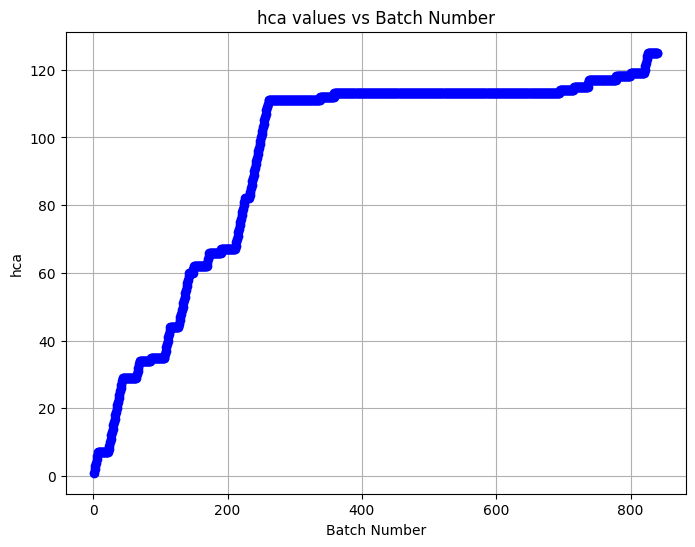

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 40

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

mb = []
sb = []

cb = []
hca = []
batch_numbers = []

tb = 1
hc = 1

for epoch in range(epochs):
    print("Epoch:", epoch + 1)
    squared_errors = []
    mb = []
    sb = []

    cb = []

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        mean = np.mean(x, axis=0)
        mean = np.tile(mean, (21, 1))
        #mean_values.append(mean)
        E_v = np.dot(mean, W) + b
        #E_v_values.append(E_v)
        vict=min(np.mean(E_v, axis=0))
        E_h = np.maximum(0, E_v)
        #E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        #E_O_values.append(E_O)

        print(W.shape)
        print(w.shape)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        #E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

        b = np.array(squared_errors)

        mb.append(np.mean(b))
        sb.append(np.std(b))

        cb_batch = 1.3 * np.exp(-squared_error) + 0.7
        cb.append(cb_batch)

        print("Squared Errors (b):", b[-num_batches:])
        print("Mean Squared Error (mb):", mb[-1])
        print("Standard Deviation of Squared Errors (sb):", sb[-1])
        print("cb (for batch {}):".format(batch + 1), cb_batch)
        print()

        min_mb = np.min(mb)
        min_sb = np.min(sb)

        result = min_mb + cb[batch] * min_sb

        batch_numbers.append(tb)
        tb = tb + 1
        hca = np.append(hca, hc)

        if mb[batch] + sb[batch] >= result:
            print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(batch + 1, batch + 1))
            print("mb[batch] + sb[batch]:", mb[batch] + sb[batch])
            print("result:", result)

            #while mb[batch] + sb[batch] >= result:

            W_layer1, b_layer1 = model.layers[1].get_weights()
            new_W_layer1 = np.concatenate((W_layer1, np.random.uniform(-1, 1, size=(W_layer1.shape[0], 1))), axis=1)
            new_b_layer1 = np.append(b_layer1, np.random.uniform(-1, 1))
            #model.layers[1].set_weights([new_W_layer1, new_b_layer1])

            W_layer2, b_layer2 = model.layers[2].get_weights()
            new_W_layer2 = np.concatenate((W_layer2, np.random.uniform(-1, 1, size=(1, W_layer2.shape[1]))), axis=0)
            new_b_layer2 = b_layer2
            #model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            hc = hc + 1

            model = keras.Sequential([
            keras.layers.Flatten(input_shape=(256, 256, 3)),
            keras.layers.Dense(hc, activation='relu'),
            keras.layers.Dense(3, activation='softmax')
            ])

            model.layers[1].set_weights([new_W_layer1, new_b_layer1])
            model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

        else:
            print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(batch + 1, batch + 1))

        #print("min(mb):", min_mb)
        #print("min(sb):", min_sb)
        #print("min(mb) + cb * min(sb) for epoch {}:".format(batch + 1), result)

train_loss, train_accuracy = model.evaluate(x_train, y_train_int, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_int, verbose=0)
print("Final Training Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)
W = model.layers[1].get_weights()[0]
w = model.layers[2].get_weights()[0]
plt.figure(figsize=(8, 6))
plt.plot(batch_numbers, hca, 'bo-')
plt.xlabel('Batch Number')
plt.ylabel('hca')
plt.title('hca values vs Batch Number')
plt.grid(True)
plt.show()

Epoch: 1
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
(196608, 1)
(1, 3)
v: [0.015621067734581131, 0.015621065931067588, 0.015621065931067588, 0.015621060520526916, 0.015621065931067588, 0.01562106232404048, 0.015621064127554037, 0.015621064127554037, 0.015621065931067588, 0.01562106232404048, 0.01562106232404048, 0.015621064127554037, 0.015621060520526916, 0.015621058717013345, 0.015621065931067588, 0.01562106232404048, 0.015621064127554037, 0.01562106232404048, 0.015621065931067588, 0.01562106232404048, 0.01562106232404048]
mv: 0.015621063612264443
sv: 2.236222245109194e-09
c: 1.979850407733291

Test failed! mv(21) + sv(21) < min(mv) + 2 * c * min(sv)
Epo

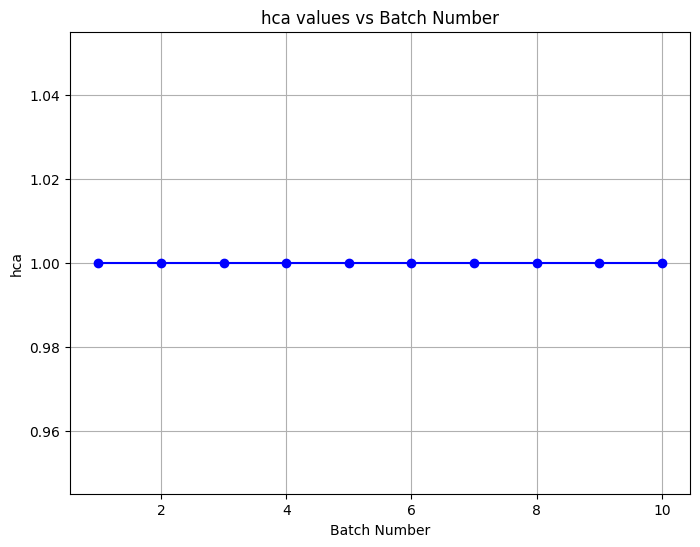

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 10

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

mv = []
sv = []
c = []
hca = []
batch_numbers = []

tb = 1
hc = 1

for epoch in range(epochs):
    print("Epoch:", epoch + 1)

    v = []
    mv = []
    sv = []
    c = []

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        mean = np.mean(x, axis=0)
        mean = np.tile(mean, (21, 1))
        mean_values.append(mean)
        E_v = np.dot(mean, W) + b
        E_v_values.append(E_v)

        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        print(W.shape)
        print(w.shape)

        E_d = np.square(np.exp(E_O)) / np.sum(np.square(np.exp(E_O)))
        E_d_values.append(E_d)

        v.append(np.mean(E_d) - np.mean(E_d) ** 2)

    mv.append(np.mean(v))
    sv.append(np.std(v))
    c.append(1.3 * np.exp(-v[-1]) + 0.7)

    print("v:", v[-num_batches:])
    print("mv:", mv[-1])
    print("sv:", sv[-1])
    print("c:", c[-1])
    print()

    min_mv = np.min(mv)
    min_sv = np.min(sv)

    result = min_mv + 2 * c[-1] * min_sv

    batch_numbers.append(tb)
    tb = tb + 1
    hca = np.append(hca, hc)

    if mv[-1] + sv[-1] >= result:
        print("Test passed! mv({}) + sv({}) >= min(mv) + 2 * c * min(sv)".format(batch + 1, batch + 1))
        print("mv[batch] + sv[batch]:", mv[-1] + sv[-1])
        print("result:", result)

        W_layer1, b_layer1 = model.layers[1].get_weights()
        new_W_layer1 = np.delete(W_layer1, -1, axis=1)
        new_b_layer1 = np.delete(b_layer1, -1)

        W_layer2, b_layer2 = model.layers[2].get_weights()
        new_W_layer2 = np.delete(W_layer2, -1, axis=0)
        new_b_layer2 = b_layer2

        hc = hc - 1

        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(256, 256, 3)),
            keras.layers.Dense(hc, activation='relu'),
            keras.layers.Dense(3, activation='softmax')
        ])

        model.layers[1].set_weights([new_W_layer1, new_b_layer1])
        model.layers[2].set_weights([new_W_layer2, new_b_layer2])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    else:
        print("Test failed! mv({}) + sv({}) < min(mv) + 2 * c * min(sv)".format(batch + 1, batch + 1))

train_loss, train_accuracy = model.evaluate(x_train, y_train_int, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_int, verbose=0)
print("Final Training Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)
W = model.layers[1].get_weights()[0]
w = model.layers[2].get_weights()[0]
plt.figure(figsize=(8, 6))
plt.plot(batch_numbers, hca, 'bo-')
plt.xlabel('Batch Number')
plt.ylabel('hca')
plt.title('hca values vs Batch Number')
plt.grid(True)
plt.show()

Epoch: 1
Squared Errors (b): [13.996004]
Mean Squared Error (mb): 13.996004
Standard Deviation of Squared Errors (sb): 0.0
cb (for batch 1): 0.700001085315381

Test passed! mb(1) + sb(1) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.996004
result: 13.996004104614258
Squared Errors (b): [13.996004 13.986685]
Mean Squared Error (mb): 13.991344
Standard Deviation of Squared Errors (sb): 0.0046596527
cb (for batch 2): 0.7000010954771767

Test passed! mb(2) + sb(2) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.996004
result: 13.991344451904297
Squared Errors (b): [13.996004 13.986685 13.997389]
Mean Squared Error (mb): 13.99336
Standard Deviation of Squared Errors (sb): 0.0047532846
cb (for batch 3): 0.7000010838136574

Test passed! mb(3) + sb(3) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.998113
result: 13.991344451904297
Squared Errors (b): [13.996004 13.986685 13.997389 13.997358]
Mean Squared Error (mb): 13.99436
Standard Deviation of Squared Errors (sb): 0.004465859

Squared Errors (b): [13.996004 13.986685 13.997389 13.997358 14.010706]
Mean Squared Error (mb): 13.997629
Standard Deviation of Squared Errors (sb): 0.007662289
cb (for batch 5): 0.7000010694760476

Test passed! mb(5) + sb(5) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 14.005291
result: 13.991344451904297


Squared Errors (b): [13.996004 13.986685 13.997389 13.997358 14.010706 14.005376]
Mean Squared Error (mb): 13.99892
Standard Deviation of Squared Errors (sb): 0.0075671724
cb (for batch 6): 0.700001075191642

Test passed! mb(6) + sb(6) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 14.006488
result: 13.991344451904297


<ipython-input-16-6ca3793b8620>:69: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-16-6ca3793b8620>:69: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Squared Errors (b): [13.996004 13.986685 13.997389 13.997358 14.010706 14.005376       nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 7): nan

Test failed! mb(7) + sb(7) < min(mb) + cb * min(sb)
Squared Errors (b): [13.996004 13.986685 13.997389 13.997358 14.010706 14.005376       nan
 25.999996]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 8): 0.7000000000066418

Test failed! mb(8) + sb(8) < min(mb) + cb * min(sb)
Squared Errors (b): [13.996004 13.986685 13.997389 13.997358 14.010706 14.005376       nan
 25.999996 14.00242 ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 9): 0.7000010783740662

Test failed! mb(9) + sb(9) < min(mb) + cb * min(sb)
Squared Errors (b): [13.996004 13.986685 13.997389 13.997358 14.010706 14.005376       nan
 25.999996 14.00242  13.99663 ]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for ba

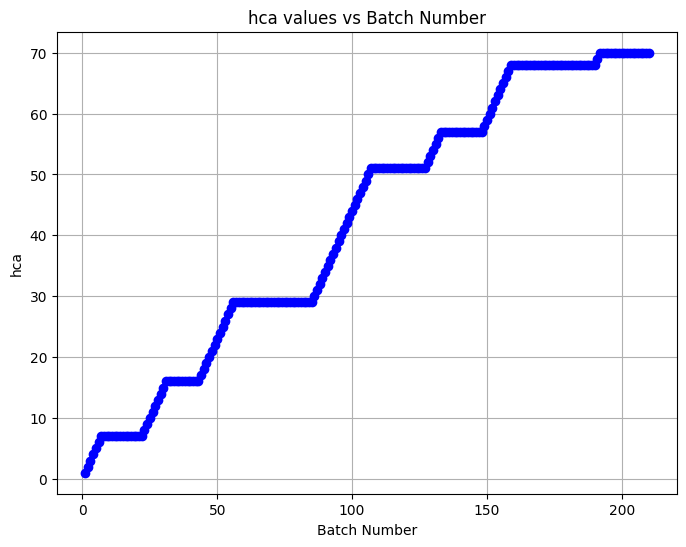

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 10

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

mb = []
sb = []
cb = []
hca = []
batch_numbers = []

tb = 1
hc = 1

for epoch in range(epochs):
    print("Epoch:", epoch + 1)
    squared_errors = []
    mb = []
    sb = []
    cb = []

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        mean = np.mean(x, axis=0)
        mean = np.tile(mean, (21, 1))
        mean_values.append(mean)
        E_v = np.dot(mean, W) + b
        E_v_values.append(E_v)
        vict = min(np.mean(E_v, axis=0))
        E_h = np.maximum(0, E_v)
        E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        E_O_values.append(E_O)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

        b = np.array(squared_errors)

        mb.append(np.mean(b))
        sb.append(np.std(b))

        cb_batch = 1.3 * np.exp(-squared_error) + 0.7
        cb.append(cb_batch)

        print("Squared Errors (b):", b[-num_batches:])
        print("Mean Squared Error (mb):", mb[-1])
        print("Standard Deviation of Squared Errors (sb):", sb[-1])
        print("cb (for batch {}):".format(batch + 1), cb_batch)
        print()

        min_mb = np.min(mb)
        min_sb = np.min(sb)

        result = min_mb + cb[batch] * min_sb

        batch_numbers.append(tb)
        tb = tb + 1
        hca = np.append(hca, hc)

        if mb[batch] + sb[batch] >= result:
            print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(batch + 1, batch + 1))
            print("mb[batch] + sb[batch]:", mb[batch] + sb[batch])
            print("result:", result)

            W_layer1, b_layer1 = model.layers[1].get_weights()
            new_W_layer1 = np.concatenate((W_layer1, np.random.uniform(-1, 1, size=(W_layer1.shape[0], 1))), axis=1)
            new_b_layer1 = np.append(b_layer1, np.random.uniform(-1, 1))
            # model.layers[1].set_weights([new_W_layer1, new_b_layer1])

            W_layer2, b_layer2 = model.layers[2].get_weights()
            new_W_layer2 = np.concatenate((W_layer2, np.random.uniform(-1, 1, size=(1, W_layer2.shape[1]))), axis=0)
            new_b_layer2 = b_layer2
            # model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            hc = hc + 1

            model = keras.Sequential([
                keras.layers.Flatten(input_shape=(256, 256, 3)),
                keras.layers.Dense(hc, activation='relu'),
                keras.layers.Dense(3, activation='softmax')
            ])

            model.layers[1].set_weights([new_W_layer1, new_b_layer1])
            model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

        else:
            print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(batch + 1, batch + 1))

train_loss, train_accuracy = model.evaluate(x_train, y_train_int, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_int, verbose=0)
print("Final Training Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)

W = model.layers[1].get_weights()[0]
w = model.layers[2].get_weights()[0]
plt.figure(figsize=(8, 6))
plt.plot(batch_numbers, hca, 'bo-')
plt.xlabel('Batch Number')
plt.ylabel('hca')
plt.title('hca values vs Batch Number')
plt.grid(True)
plt.show()

Epoch: 1
(196608, 1)
(1, 3)
Squared Errors (b): [13.996004]
Mean Squared Error (mb): 13.996004
Standard Deviation of Squared Errors (sb): 0.0
cb (for batch 1): 0.700001085315381

Test passed! mb(1) + sb(1) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.996004
result: 13.996004104614258
(196608, 3)
(3, 3)
Squared Errors (b): [13.996004 13.986685]
Mean Squared Error (mb): 13.991344
Standard Deviation of Squared Errors (sb): 0.0046596527
cb (for batch 2): 0.7000010954771767

Test passed! mb(2) + sb(2) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.996004
result: 13.991344451904297
(196608, 5)
(5, 3)
Squared Errors (b): [13.996004 13.986685 13.997389]
Mean Squared Error (mb): 13.99336
Standard Deviation of Squared Errors (sb): 0.0047532846
cb (for batch 3): 0.7000010838136574

Test passed! mb(3) + sb(3) >= min(mb) + cb * min(sb)
mb[batch] + sb[batch]: 13.998113
result: 13.991344451904297
(196608, 7)
(7, 3)
Squared Errors (b): [13.996004 13.986685 13.997389 25.195662]
Mean Squared

<ipython-input-17-bc512811d5cd>:74: RuntimeWarning: overflow encountered in exp
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
<ipython-input-17-bc512811d5cd>:74: RuntimeWarning: invalid value encountered in true_divide
  E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)


Streaming output truncated to the last 5000 lines.
Test failed! mb(20) + sb(20) < min(mb) + cb * min(sb)
(196608, 39)
(39, 3)
Squared Errors (b): [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 21): nan

Test failed! mb(21) + sb(21) < min(mb) + cb * min(sb)
Epoch: 12
(196608, 39)
(39, 3)
Squared Errors (b): [nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 1): nan

Test failed! mb(1) + sb(1) < min(mb) + cb * min(sb)
(196608, 39)
(39, 3)
Squared Errors (b): [nan nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 2): nan

Test failed! mb(2) + sb(2) < min(mb) + cb * min(sb)
(196608, 39)
(39, 3)
Squared Errors (b): [nan nan nan]
Mean Squared Error (mb): nan
Standard Deviation of Squared Errors (sb): nan
cb (for batch 3): nan

Test failed! mb(3) + sb(3) < min(mb) + cb * min(s

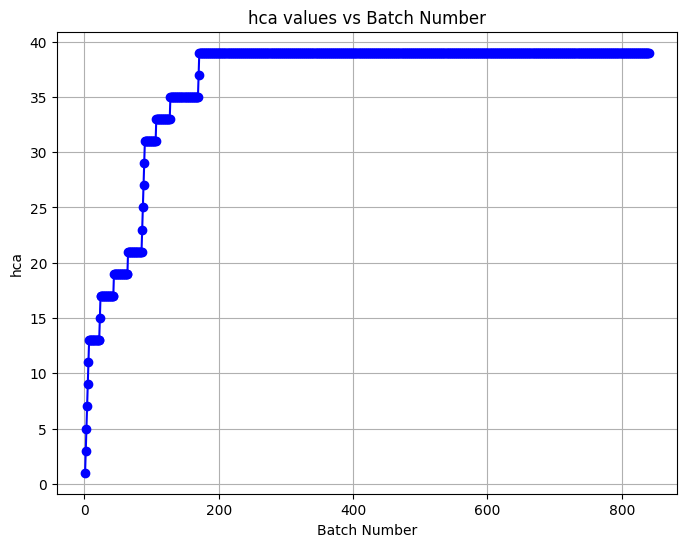

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(1, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

batch_size = 21
epochs = 40

num_batches = len(x_train) // batch_size

mean_values = []
E_v_values = []
E_h_values = []
E_O_values = []
E_d_values = []

mb = []
sb = []

cb = []
hca = []
batch_numbers = []

tb = 1
hc = 1

for epoch in range(epochs):
    print("Epoch:", epoch + 1)
    squared_errors = []
    mb = []
    sb = []

    cb = []

    for batch in range(num_batches):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train_int[batch * batch_size: (batch + 1) * batch_size]

        history = model.train_on_batch(x_batch, y_batch)

        W = model.layers[1].get_weights()[0]
        b = model.layers[1].get_weights()[1]
        x = x_batch.reshape(len(x_batch), -1)
        mean = np.mean(x, axis=0)
        mean = np.tile(mean, (21, 1))
        #mean_values.append(mean)
        E_v = np.dot(mean, W) + b
        #E_v_values.append(E_v)
        vict=min(np.mean(E_v, axis=0))
        E_h = np.maximum(0, E_v)
        #E_h_values.append(E_h)

        w = model.layers[2].get_weights()[0]
        B = model.layers[2].get_weights()[1]
        E_O = np.dot(E_h, w) + B
        #E_O_values.append(E_O)

        print(W.shape)
        print(w.shape)

        E_d = np.exp(E_O) / np.sum(np.exp(E_O), axis=1, keepdims=True)
        #E_d_values.append(E_d)

        y_batch_one_hot = to_categorical(y_batch, num_classes=3)

        squared_error = np.sum((E_d - y_batch_one_hot) ** 2)
        squared_errors.append(squared_error)

        b = np.array(squared_errors)

        mb.append(np.mean(b))
        sb.append(np.std(b))

        cb_batch = 1.3 * np.exp(-squared_error) + 0.7
        cb.append(cb_batch)

        print("Squared Errors (b):", b[-num_batches:])
        print("Mean Squared Error (mb):", mb[-1])
        print("Standard Deviation of Squared Errors (sb):", sb[-1])
        print("cb (for batch {}):".format(batch + 1), cb_batch)
        print()

        min_mb = np.min(mb)
        min_sb = np.min(sb)

        result = min_mb + cb[batch] * min_sb

        batch_numbers.append(tb)
        tb = tb + 1
        hca = np.append(hca, hc)

        if mb[batch] + sb[batch] >= result:
            print("Test passed! mb({}) + sb({}) >= min(mb) + cb * min(sb)".format(batch + 1, batch + 1))
            print("mb[batch] + sb[batch]:", mb[batch] + sb[batch])
            print("result:", result)

            new_neurons = 2

            W_layer1, b_layer1 = model.layers[1].get_weights()
            new_W_layer1 = np.concatenate((W_layer1, np.random.uniform(-1, 1, size=(W_layer1.shape[0], new_neurons))), axis=1)
            new_b_layer1 = np.append(b_layer1, np.random.uniform(-1, 1, size=new_neurons))
            # model.layers[1].set_weights([new_W_layer1, new_b_layer1])

            W_layer2, b_layer2 = model.layers[2].get_weights()
            new_W_layer2 = np.concatenate((W_layer2, np.random.uniform(-1, 1, size=(new_neurons, W_layer2.shape[1]))), axis=0)
            new_b_layer2 = b_layer2
            # model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            hc += new_neurons

            model = keras.Sequential([
                keras.layers.Flatten(input_shape=(256, 256, 3)),
                keras.layers.Dense(hc, activation='relu'),
                keras.layers.Dense(3, activation='softmax')
            ])

            model.layers[1].set_weights([new_W_layer1, new_b_layer1])
            model.layers[2].set_weights([new_W_layer2, new_b_layer2])

            model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

        else:
            print("Test failed! mb({}) + sb({}) < min(mb) + cb * min(sb)".format(batch + 1, batch + 1))

train_loss, train_accuracy = model.evaluate(x_train, y_train_int, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_int, verbose=0)
print("Final Training Accuracy:", train_accuracy)
print("Final Test Accuracy:", test_accuracy)
W = model.layers[1].get_weights()[0]
w = model.layers[2].get_weights()[0]
plt.figure(figsize=(8, 6))
plt.plot(batch_numbers, hca, 'bo-')
plt.xlabel('Batch Number')
plt.ylabel('hca')
plt.title('hca values vs Batch Number')
plt.grid(True)
plt.show()